In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


In [42]:
import csv

input_file = "lda.csv"
output_file = "cleaned_lda.csv"

with open(input_file, "r", encoding="utf-8", errors="replace") as file_in, open(output_file, "w", encoding="utf-8", newline="") as file_out:
    reader = csv.reader(file_in)
    writer = csv.writer(file_out)
    
    for row in reader:
        try:
            writer.writerow(row)
        except UnicodeDecodeError:
            continue

In [45]:
data = data.fillna(" ")
docs = data["cons"].tolist()

In [69]:
data = pd.read_csv("cleaned_lda.csv")
docs = data["cons"]

In [46]:
data.head()

company                                            summary  \
0  google                           Best Company to work for   
1  google  Moving at the speed of light, burn out is inev...   
2  google  Great balance between big-company security and...   
3  google  The best place I've worked and also the most d...   
4  google                    Unique, one of a kind dream job   

                                                pros  \
0                      People are smart and friendly   
1  1) Food, food, food. 15+ cafes on main campus ...   
2  * If you're a software engineer, you're among ...   
3  You can't find a more well-regarded company th...   
4  Google is a world of its own. At every other c...   

                                                cons  rating  
0                 Bureaucracy is slowing things down       1  
1  1) Work/life balance. What balance? All those ...       1  
2  * It *is* becoming larger, and with it comes g...       1  
3  I live in SF so the commute can take between 1...       1  
4  If you don't work in MTV (HQ), you will be giv...       1

In [47]:
data['rating'].value_counts()

1    58341
0     9188
Name: rating, dtype: int64

In [48]:
data['cons'].isnull().sum()

0

In [73]:
# 使用TF-IDF向量化文本
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(docs)
num_topics = range(1, 11)
perplexity = []
for n in num_topics:
    lda_models = LatentDirichletAllocation(n_components=n, max_iter=8, learning_method='online')
    lda_models.fit(tfidf)
    perplexity.append(lda_models.perplexity(tfidf))

In [74]:
coherence_scores = []
num_topics = range(1, 11) 

for lda_model in lda_models:
    coherence_model = CoherenceModel(model=lda_model, texts=docs, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

data = pd.DataFrame({'num_topics': num_topics, 'coherence_score': coherence_scores})
print(data)

TypeError: 'LatentDirichletAllocation' object is not iterable

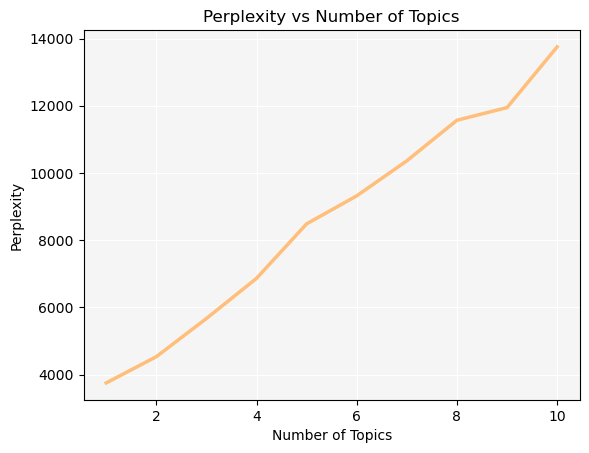

In [50]:
plt.plot(num_topics, perplexity, color='#FFBE7A', linewidth=2.5)
#plt.fill_between(num_topics, perplexity, color='#E0E0E0')
#plt.fill_between(num_topics, perplexity, y2=max(perplexity), color='#DCDCDC')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')
plt.title('Perplexity vs Number of Topics')
plt.grid(color='white')
plt.rcParams['axes.facecolor'] = '#F5F5F5'
plt.show()

In [51]:
best_num_topics = 8
lda = LatentDirichletAllocation(n_components=best_num_topics, max_iter=8, learning_method='online')
lda.fit(tfidf)

LatentDirichletAllocation(learning_method='online', max_iter=8, n_components=8)

Top 20 words for Topic #0:


C:\Users\TracyCui\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['fast', 'boring', 'overtime', 'paced', 'pace', 'staff', 'breaks', 'repetitive', 'break', 'negative', 'long', 'hours', 'schedules', 'hour', 'stress', 'season', 'facebook', 'mandatory', 'crazy', 'intense']


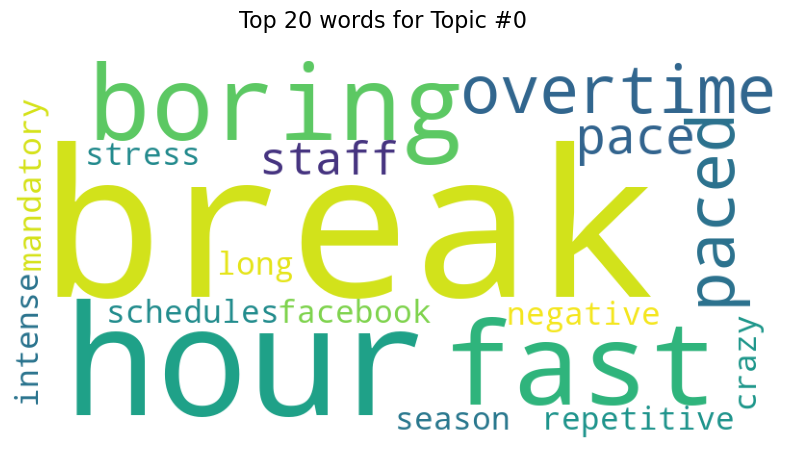

Top 20 words for Topic #1:
['work', 'management', 'people', 'company', 'managers', 'microsoft', 'time', 'lot', 'don', 'employees', 'job', 'like', 'customers', 'high', 'just', 'team', 'good', 'working', 'pressure', 'hard']


C:\Users\TracyCui\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


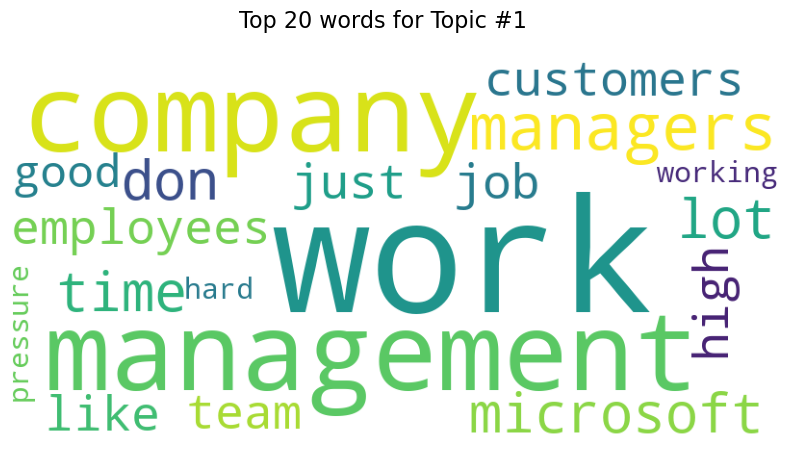

Top 20 words for Topic #2:
['cons', 'think', 'bad', 'say', 'really', 'focused', 'good', 'dont', 'working', 'place', 'company', 'red', 'tape', 'don', 'tough', 'prepared', 'commute', 'standards', 'walking', 'live']


C:\Users\TracyCui\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


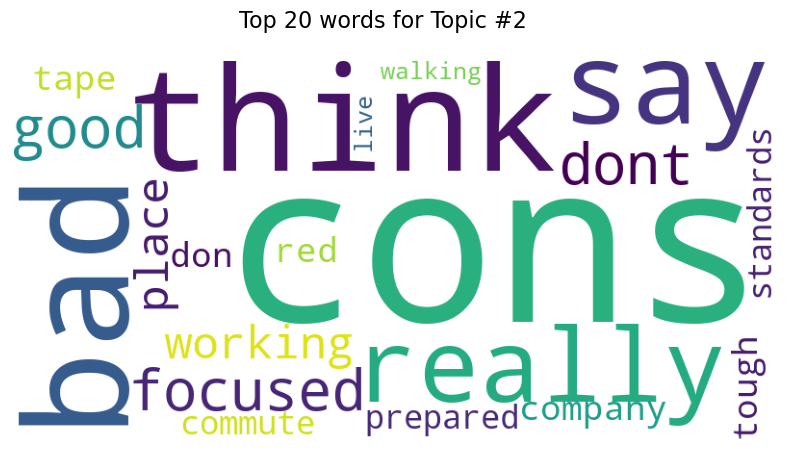

Top 20 words for Topic #3:
['apple', 'looking', 'promote', 'legacy', 'friendly', 'multiple', 'potential', 'downside', 'layoffs', 'quick', 'annoying', 'add', 'easy', 'entitled', 'careful', 'list', 'freedom', 'watch', 'cog', 'gain']


C:\Users\TracyCui\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


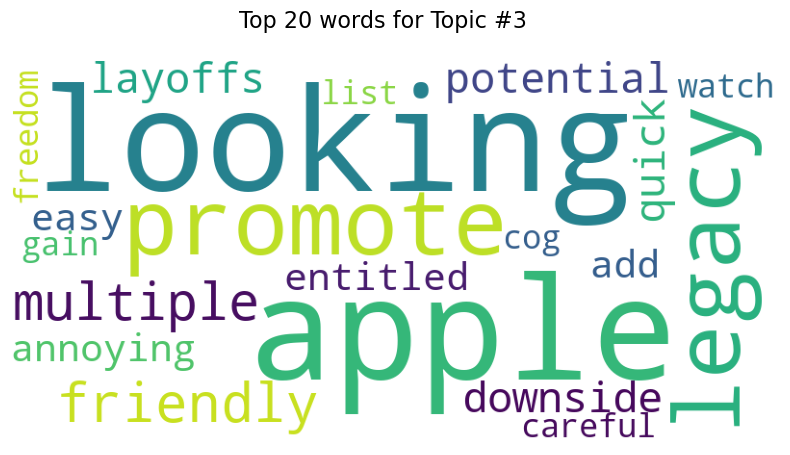

Top 20 words for Topic #4:
['work', 'life', 'balance', 'company', 'opportunities', 'slow', 'growth', 'hard', 'career', 'politics', 'difficult', 'great', 'big', 'management', 'large', 'organization', 'lot', 'poor', 'good', 'group']


C:\Users\TracyCui\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


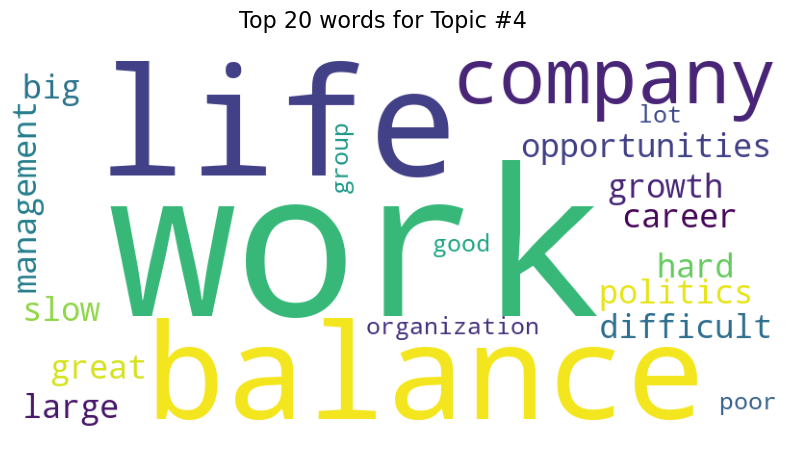

Top 20 words for Topic #5:
['salary', 'pay', 'low', 'company', 'make', 'processes', 'moving', 'big', 'like', 'come', 'old', 'position', 'support', 'lack', 'terrible', 'stack', 'small', 'work', 'year', 'companies']


C:\Users\TracyCui\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


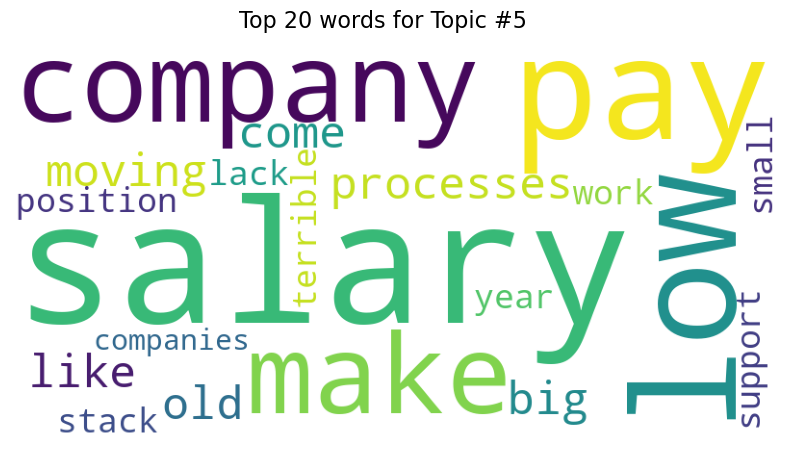

Top 20 words for Topic #6:
['amazon', 'demanding', 'expected', 'day', 'meetings', 'redmond', 'food', 'free', 'progression', 'competition', 'downsides', 'rude', 'talent', 'bonus', 'office', 'standing', 'location', 'night', 'plan', 'share']


C:\Users\TracyCui\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


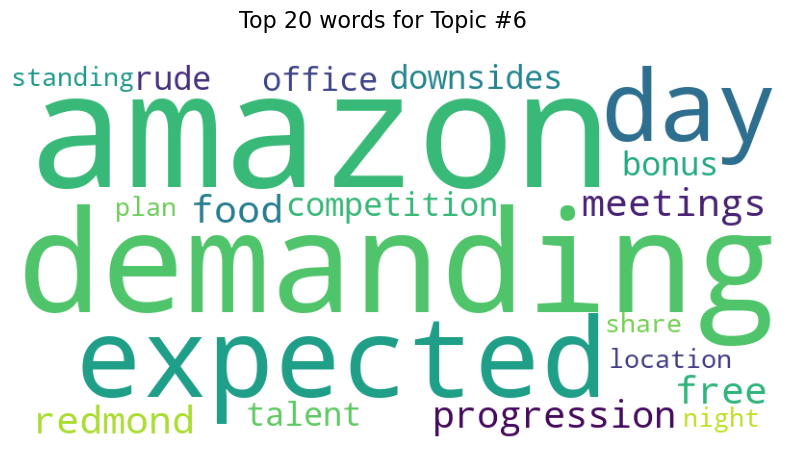

Top 20 words for Topic #7:
['hours', 'long', 'retail', 'work', 'competitive', 'times', 'lots', 'schedule', 'busy', 'shifts', 'lack', 'time', 'environment', 'stressful', 'week', 'days', 'shift', 'weekends', 'holidays', 'communication']


C:\Users\TracyCui\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


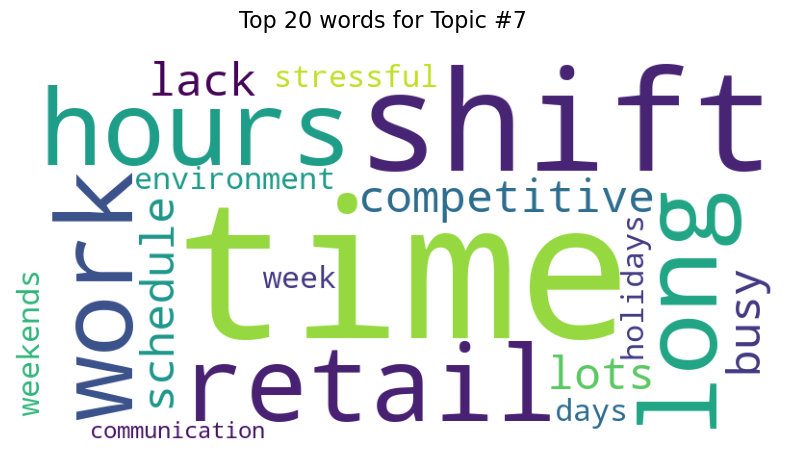

In [58]:
for topic_idx, topic in enumerate(lda.components_):
    print("\033[50m" + f"Top 20 words for Topic #{topic_idx}:")
    top_words_idx = topic.argsort()[:-21:-1]
    top_words = [tfidf_vectorizer.get_feature_names()[i] for i in top_words_idx]
    print(top_words)
    stopwords = ["america","americans","american","white","black","https","40k","200k","people",'WWW']
    wordcloud = WordCloud(background_color='white', width=800, height=400,stopwords=stopwords).generate(' '.join(top_words))
    plt.figure(figsize=(10, 5))
    plt.suptitle(f"Top 20 words for Topic #{topic_idx}", fontsize=16)
    plt.imshow(wordcloud)
    plt.axis('off')
    #plt.title(f"Top 10 words for Topic #{topic_idx}")
    plt.show()

In [60]:
topic_distributions = lda.transform(tfidf)

topic_labels = topic_distributions.argmax(axis=1)

data['Topic'] = topic_labels

In [61]:
data.to_csv('predictdata_with_topic.csv', index=False)

In [76]:

df = pd.read_csv("predictdata_with_topic.csv")

df['Topic'] = df['Topic']

result = df.groupby(['Topic', 'rating']).size().unstack(fill_value=0)

#result['-1_ratio'] = result.apply(lambda row: row[-1] / row.sum(), axis=1)
result['0_ratio'] = result.apply(lambda row: row[0] / row.sum(), axis=1)
result['1_ratio'] = result.apply(lambda row: row[1] / row.sum(), axis=1)

print(result)

rating     0      1   0_ratio   1_ratio
Topic                                  
0        177   1886  0.085797  0.914165
1       6195  26040  0.192182  0.807813
2         86   2684  0.031047  0.968942
3        124   1083  0.102734  0.897190
4        753   9806  0.071314  0.928680
5       1014   8076  0.111551  0.888438
6        283   2996  0.086307  0.913669
7        556   5770  0.087891  0.912096


In [81]:
best_num_topics

8

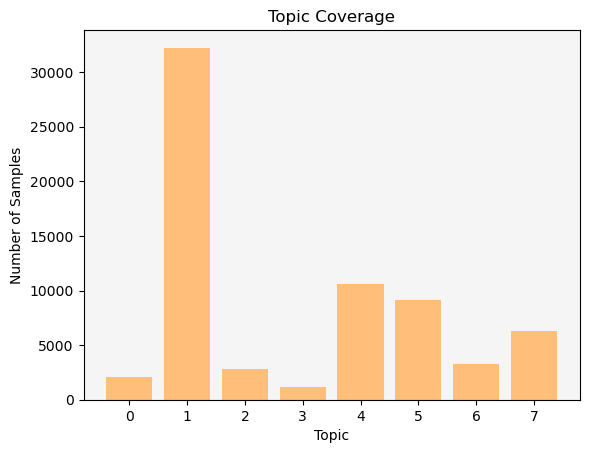

In [90]:
topic_counts = df['Topic'].value_counts()

plt.bar(topic_counts.index, topic_counts.values, color='#FFBE7A')

plt.xlabel('Topic')
plt.ylabel('Number of Samples')

plt.title('Topic Coverage')
plt.show()